In [1]:
from tensorflow import keras 
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 21s 22ms/step - loss: 0.1656 - accuracy: 0.9484
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0457 - accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0312 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 19s 21ms/step - loss: 0.0235 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 19s 21ms/step - loss: 0.0181 - accuracy: 0.9947


In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0266 - accuracy: 0.9913


In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [6]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0136 - accuracy: 0.9959
Epoch 2/5
938/938 [==============================] - 20s 22ms/step - loss: 0.0111 - accuracy: 0.9966
Epoch 3/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0086 - accuracy: 0.9976
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0069 - accuracy: 0.9979
Epoch 5/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0060 - accuracy: 0.9981


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9922


In [8]:
print(f"Test accuracy: {test_acc:.3f}")

Test accuracy: 0.992


In [27]:
from sklearn.metrics import confusion_matrix ,classification_report
predictions = model.predict(test_images, steps=len(test_images), verbose=0)

In [12]:
import numpy as np
y_pred = np.argmax(predictions, axis=-1)

In [22]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [23]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [24]:
cf = confusion_matrix(test_labels,y_pred)

In [25]:
cf

array([[ 975,    0,    1,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   2,    0, 1024,    0,    1,    0,    1,    3,    1,    0],
       [   0,    0,    1, 1006,    0,    3,    0,    0,    0,    0],
       [   0,    0,    0,    0,  974,    0,    3,    0,    1,    4],
       [   1,    0,    0,    3,    0,  885,    1,    0,    1,    1],
       [   2,    1,    0,    0,    1,    2,  951,    0,    1,    0],
       [   0,    2,    1,    0,    0,    0,    0, 1024,    0,    1],
       [   2,    0,    1,    1,    0,    1,    0,    2,  967,    0],
       [   1,    0,    0,    0,    6,    7,    1,    4,    8,  982]],
      dtype=int64)

In [28]:
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

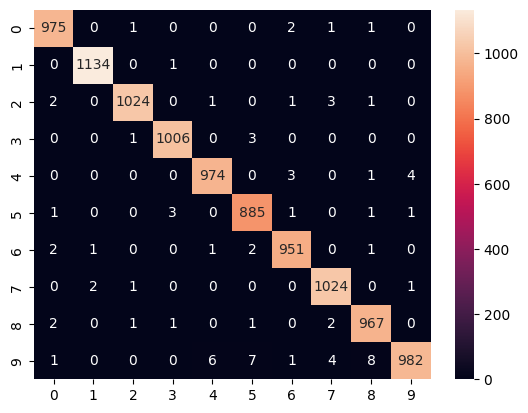

In [29]:
import seaborn as sns
sns.heatmap(cf,fmt='g', annot = True)